<a href="https://colab.research.google.com/github/DurgaArun88/CreditCardCapstoneprojectt/blob/main/CreditCardFraudDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# DATA PREPROCESSING

In [2]:
# import the libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Loading the data using pandas

df = pd.read_csv('/content/sample_data/creditcard.csv')

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [6]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [7]:
df.shape

(237697, 31)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237697 entries, 0 to 237696
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    237697 non-null  float64
 1   V1      237697 non-null  float64
 2   V2      237697 non-null  float64
 3   V3      237697 non-null  float64
 4   V4      237697 non-null  float64
 5   V5      237697 non-null  float64
 6   V6      237697 non-null  float64
 7   V7      237696 non-null  float64
 8   V8      237696 non-null  float64
 9   V9      237696 non-null  float64
 10  V10     237696 non-null  float64
 11  V11     237696 non-null  float64
 12  V12     237696 non-null  float64
 13  V13     237696 non-null  float64
 14  V14     237696 non-null  float64
 15  V15     237696 non-null  float64
 16  V16     237696 non-null  float64
 17  V17     237696 non-null  float64
 18  V18     237696 non-null  float64
 19  V19     237696 non-null  float64
 20  V20     237696 non-null  float64
 21  V21     23

In [9]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,1
V8,1
V9,1


In [10]:
df.dropna(inplace=True)

In [11]:
df.shape

(237696, 31)

In [13]:
# basic stitistics of the dataset
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,237696.000000,237696.000000,237696.000000,237696.000000,237696.000000,237696.000000,237696.000000,237696.000000,237696.000000,237696.000000,...,237696.000000,237696.000000,237696.000000,237696.000000,237696.000000,237696.000000,237696.000000,237696.000000,237696.000000,237696.000000
mean,81871.538924,-0.056080,-0.018313,0.142945,0.036314,-0.051216,0.024601,-0.020659,0.002256,0.001530,...,-0.004237,-0.017420,-0.008465,0.000459,0.030182,0.002341,-0.000286,0.001421,91.166845,0.001817
std,41002.067150,1.958946,1.673243,1.501619,1.414490,1.378386,1.325296,1.231280,1.205227,1.118834,...,0.743184,0.712807,0.643693,0.606529,0.512419,0.486523,0.402552,0.333792,252.237773,0.042593
min,0.000000,-56.407510,-72.715728,-33.680984,-5.683171,-42.147898,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-11.710896,0.000000,0.000000
25%,48832.750000,-0.944733,-0.606263,-0.641358,-0.830886,-0.738649,-0.739744,-0.566363,-0.198608,-0.659212,...,-0.225502,-0.533684,-0.166238,-0.349938,-0.281698,-0.330711,-0.070262,-0.049305,6.000000,0.000000
50%,75232.500000,-0.021740,0.063993,0.331616,0.029086,-0.108953,-0.244125,0.015041,0.031032,-0.063551,...,-0.033047,-0.007017,-0.020704,0.046300,0.064976,-0.059379,0.002891,0.015005,23.490000,0.000000
75%,123559.000000,1.252519,0.780891,1.129058,0.819307,0.549477,0.427929,0.540745,0.331364,0.609558,...,0.172554,0.483697,0.130949,0.429272,0.369590,0.250693,0.089156,0.078029,79.990000,0.000000
max,149353.000000,2.454930,22.057729,9.382558,16.875344,34.801666,22.529298,36.877368,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.022866,7.519589,3.517346,12.152401,33.847808,19656.530000,1.000000


In [14]:
# Handling imbalanced data

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
sc = StandardScaler()
df['Amount']=sc.fit_transform(pd.DataFrame(df['Amount']))

In [17]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.231739,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.350768,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.139773,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.128185,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.083956,0.0


In [18]:
df.duplicated().sum()

884

In [19]:
df.drop_duplicates(inplace=True)

In [20]:
df.shape

(236812, 31)

In [21]:
df['Class'].value_counts()

,count
Class,
0.0,236399
1.0,413


<Axes: xlabel='Class', ylabel='count'>

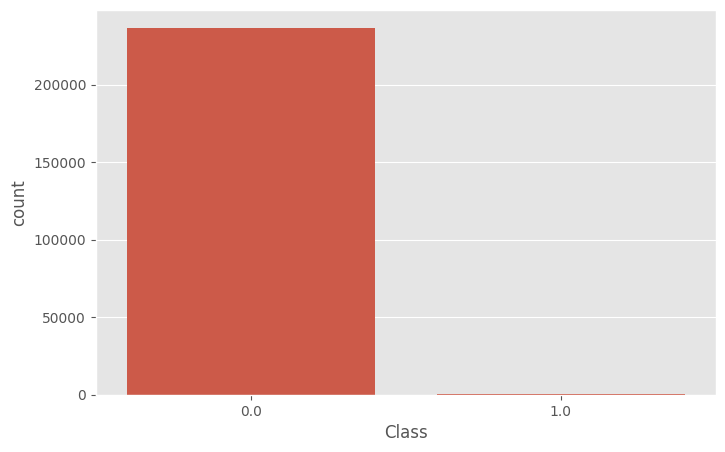

In [22]:
plt.figure(figsize=(8,5))
plt.style.use('ggplot')
sns.countplot(x='Class', data=df)

In [25]:
# Split the dataset into training and testing sets

X=df.drop(['Class', 'Time','Amount'], axis=1)
y=df['Class']

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [29]:

classifier = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree Classifier': DecisionTreeClassifier()
}
for name, clf in classifier.items():
  print(f"\n--- {name} ----")
  clf.fit(X_train, y_train)
  y_pred=clf.predict(X_test)
  print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
  print(f"Precision Score: {precision_score(y_test, y_pred)}")
  print(f"Recall Score: {recall_score(y_test, y_pred)}")
  print(f"f1 Score: {f1_score(y_test, y_pred)}")


--- Logistic Regression ----
Accuracy Score: 0.9990710047927708
Precision Score: 0.9
Recall Score: 0.5357142857142857
f1 Score: 0.6716417910447762

--- Decision Tree Classifier ----
Accuracy Score: 0.9990710047927708
Precision Score: 0.7777777777777778
Recall Score: 0.6666666666666666
f1 Score: 0.717948717948718


In [30]:
# UnderSampling

In [31]:
Valid = df[df['Class']==0]
Fraud = df[df['Class']==1]

In [32]:
Valid.shape

(236399, 31)

In [33]:
Fraud.shape

(413, 31)

In [34]:
Valid_sample = Valid.sample(n=473)

In [35]:
Valid_sample.shape

(473, 31)

In [36]:
New_data = pd.concat([Valid_sample, Fraud], ignore_index=True)

In [37]:
New_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,44756.0,-0.944293,-0.893246,1.450469,-1.574347,-1.211126,0.504873,-1.260311,0.795532,-2.720401,...,0.277695,0.834584,0.142682,-0.297305,-0.509950,-0.030804,0.071041,-0.004955,-0.048236,0.0
1,36741.0,-2.042143,1.130448,0.958290,1.676647,-0.280423,0.137395,1.590406,-0.147477,-0.913002,...,0.012235,0.250466,-0.503231,0.440106,0.113188,-0.137551,-0.705064,-0.215300,0.416961,0.0
2,101248.0,1.851128,-0.794158,-1.706144,-0.471172,1.747981,3.839358,-1.215033,0.910539,2.173505,...,0.075158,0.322950,0.172141,0.692063,-0.338583,0.511664,-0.048266,-0.046499,-0.036342,0.0
3,45385.0,0.319387,-1.800757,1.572238,2.152927,-2.081573,0.749389,-0.831438,0.371330,2.063673,...,0.302308,0.447174,-0.484965,0.420798,0.388033,-0.134953,0.039199,0.106399,1.224376,0.0
4,125065.0,-0.745333,0.226228,-0.020762,0.098583,0.643678,1.528429,-0.384424,0.961229,-1.459936,...,-0.035127,0.568681,-0.122345,-1.664858,-0.362378,-0.230230,0.418529,0.121894,-0.282142,0.0


In [38]:
New_data['Class'].value_counts()

,count
Class,
0.0,473
1.0,413


In [39]:
X = New_data.drop(['Class', 'Time','Amount'], axis=1)
y = New_data['Class']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
classifier = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree Classifier': DecisionTreeClassifier()
}
for name, clf in classifier.items():
  print(f"\n--- {name} ----")
  clf.fit(X_train, y_train)
  y_pred=clf.predict(X_test)
  print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
  print(f"Precision Score: {precision_score(y_test, y_pred)}")
  print(f"Recall Score: {recall_score(y_test, y_pred)}")
  print(f"f1 Score: {f1_score(y_test, y_pred)}")


--- Logistic Regression ----
Accuracy Score: 0.9438202247191011
Precision Score: 0.9452054794520548
Recall Score: 0.92
f1 Score: 0.9324324324324325

--- Decision Tree Classifier ----
Accuracy Score: 0.9213483146067416
Precision Score: 0.9178082191780822
Recall Score: 0.8933333333333333
f1 Score: 0.9054054054054054


In [42]:
X_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
44,-1.247162,1.331354,1.446544,2.616706,1.164565,-0.406092,1.295242,-0.117722,-2.006193,0.747305,...,-2.537451,-0.428862,0.115618,0.271229,0.061623,0.360607,0.102929,-0.141973,-0.157603,0.119509
388,2.075597,0.292602,-1.620364,0.583829,0.619016,-0.726115,0.144804,-0.347280,1.686782,-0.771679,...,-0.098294,-0.136245,-0.513269,-1.108311,0.317786,0.336712,-0.240225,0.139718,-0.086597,-0.035743
704,-2.271755,-0.457655,-2.589055,2.230778,-4.278983,0.388610,0.102485,0.813128,-1.092921,-5.032028,...,2.783383,2.285758,1.096342,0.658399,1.711676,0.333540,0.538591,-0.193529,0.258194,0.247269
643,1.036639,0.407227,0.757706,3.161821,-0.568122,0.202181,-0.689804,0.411380,0.336769,-0.283731,...,-0.666806,-0.219461,-0.050108,0.123761,-0.132568,0.350231,0.507701,0.189621,0.061016,0.063141
881,0.218810,2.715855,-5.111658,6.310661,-0.848345,-0.882446,-2.902079,0.939162,-3.627698,-1.873331,...,1.935484,0.381682,1.083640,1.037324,0.062325,0.532490,-0.149145,0.639580,0.351568,-0.001817


In [43]:
# OverSampling

In [44]:
X=df.drop(['Class', 'Time','Amount'], axis=1)
y=df['Class']

In [45]:
X.shape

(236812, 28)

In [46]:
y.shape

(236812,)

In [47]:
from imblearn.over_sampling import SMOTE

In [48]:
X_res, y_res = SMOTE().fit_resample(X, y)

In [49]:
y_res.value_counts()

,count
Class,
0.0,236399
1.0,236399


In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [51]:
# Evaluate Model Performance

In [52]:
classifier = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree Classifier': DecisionTreeClassifier()
}
for name, clf in classifier.items():
  print(f"\n--- {name} ----")
  clf.fit(X_train, y_train)
  y_pred=clf.predict(X_test)
  print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
  print(f"Precision Score: {precision_score(y_test, y_pred)}")
  print(f"Recall Score: {recall_score(y_test, y_pred)}")
  print(f"f1 Score: {f1_score(y_test, y_pred)}")


--- Logistic Regression ----
Accuracy Score: 0.9458439086294417
Precision Score: 0.975105513801431
Recall Score: 0.9149125407648977
f1 Score: 0.9440505195074785

--- Decision Tree Classifier ----
Accuracy Score: 0.9981493231810491
Precision Score: 0.9974412654105606
Recall Score: 0.9988564652068951
f1 Score: 0.9981483636825343


In [53]:
dtc = DecisionTreeClassifier()
dtc.fit(X_res, y_res)

DecisionTreeClassifier()

In [54]:
print(X_res)

              V1        V2        V3        V4        V5        V6        V7  \
0      -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1       1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2      -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3      -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4      -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   
...          ...       ...       ...       ...       ...       ...       ...   
472793 -1.407291  1.569166 -1.336293  1.206814 -1.136914 -1.087500 -2.293961   
472794 -1.912225  3.380664 -6.184329  3.852494 -0.497428 -1.994872 -2.834604   
472795  0.633309 -0.701324  0.931841  0.724626 -1.155914 -0.270479 -0.432689   
472796  0.730938  1.549945 -3.949793  3.422896 -0.431569 -0.884277 -2.348321   
472797 -5.608031  3.867822 -5.351808  2.954479 -0.843968  0.677671 -4.677221   

              V8        V9       V10  .

In [55]:
import  pickle
import gzip

with gzip.open('dtc.pkl.gz','wb') as f:
  pickle.dump(dtc,f)

In [56]:
model = pickle.load(gzip.open('dtc.pkl.gz','rb'))

In [57]:
Example_input = [[0.1,1.2,3.2,1.3,1.5,2.2,1.0,1.2,1.3,0.5,0.6,0.7,0.9,2.4,2.4,2.5,2.2,2.6,1.5,1.3,2.6,3.1,3.5,3.6,3.8,2.9,2.7,2.4]]
prediction = dtc.predict(Example_input)
print(prediction)

[0.]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [58]:

if prediction ==0:
  print('Valid Transaction')
else:
  print('Fraud Transaction')

Valid Transaction


In [59]:
import sklearn
sklearn.__version__

'1.6.1'

In [60]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 67.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 63.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.8 MB/s eta 0:00:00


In [63]:
%%writefile app.py
import streamlit as st
import pickle
import numpy as np
import gzip


dtc=pickle.load(gzip.open('dtc.pkl.gz','rb'))

st.title("CREDIT CARD FRAUD DETECTION")
st.write("This application predicts whether a transaction is valid or fraudulent based on the input data")

st.write("Example_input = [[0.1,1.2,3.2,1.3,1.5,2.2,1.0,1.2,1.3,0.5,0.6,0.7,0.9,2.4,2.4,2.5,2.2,2.6,1.5,1.3,2.6,3.1,3.5,3.6,3.8,2.9,2.7,2.4]]")

input_data = st.text_input('Enter the input data(comma separated values)','')


submit = st.button('Predict')

if submit:
   try:
      input_split_data = input_data.split(',')
      features = np.asarray(input_split_data, dtype=np.float32)
      prediction = dtc.predict(features.reshape(1,-1))

      if prediction[0]==0:
        st.success('Valid Transaction')
      else:
        st.error('Fraud Transaction')

   except ValueError:
    st.error('Invalid input')
   except Exception as e:
    st.error(f'An error occurred: {e}')

Writing app.py


In [64]:
!streamlit run app.py & npx localtunnel --port 8501



⠙⠹⠸
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.245.53.239:8501

⠼⠴⠦⠧⠇your url is: https://nine-hornets-occur.loca.lt
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
  Stopping...
^C
